# Financial Inclusion: Gender Gap According to Educational Attainment and the Reasons without Bank Account

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and read the data
data = pd.read_csv("/content/ph_data_1.csv", encoding="ISO-8859-1")
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,has_account
0,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,175160143,0.177654,2,34.0,3,5,...,4,4,4.0,1,5.0,1,1,1,1.0,1
1,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,196715468,0.318118,1,25.0,3,4,...,4,4,4.0,2,4.0,1,1,1,0.0,1
2,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,137538586,0.422107,1,26.0,2,5,...,4,4,4.0,4,3.0,1,2,1,1.0,1
3,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,132202737,1.299141,1,23.0,3,5,...,4,4,4.0,4,1.0,1,1,1,1.0,1
4,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,139964446,1.165876,1,33.0,2,3,...,4,4,4.0,2,5.0,1,1,0,0.0,0


In [ ]:
# Make a copy of the dataframe
ph_data = data.copy()
ph_data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,has_account
0,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,175160143,0.177654,2,34.0,3,5,...,4,4,4.0,1,5.0,1,1,1,1.0,1
1,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,196715468,0.318118,1,25.0,3,4,...,4,4,4.0,2,4.0,1,1,1,0.0,1
2,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,137538586,0.422107,1,26.0,2,5,...,4,4,4.0,4,3.0,1,2,1,1.0,1
3,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,132202737,1.299141,1,23.0,3,5,...,4,4,4.0,4,1.0,1,1,1,1.0,1
4,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,139964446,1.165876,1,33.0,2,3,...,4,4,4.0,2,5.0,1,1,0,0.0,0


In [ ]:
# Count the values of has_account column
# 1 means that they have an account in financial institutions (account_fin)
# OR in mobile (account_mob)
ph_data["has_account"].value_counts()

1    627
0    373
Name: has_account, dtype: int64

In [ ]:
# Count the values of female column
ph_data["female"].value_counts()

1    573
2    427
Name: female, dtype: int64

In [ ]:
# Count the values of female column
ph_data[["female", "educ", "has_account"]].value_counts()

female  educ  has_account
1       2     1              180
              0              161
2       2     1              144
1       3     1              126
2       3     1              122
        2     0               91
1       1     0               57
2       1     0               36
1       1     1               35
2       1     1               20
1       3     0               14
2       3     0               14
dtype: int64

## % Has Account According to Educational Attainment

This code first groups the data by both 'female' and 'educ', and aggregates the data by the total number of account owners and the total population for each group. It then calculates the percentage of the population with accounts then sort the values from greatest to least.

In [ ]:
# Group the data by female and educ columns and apply aggregations
ph_data_grouped = ph_data.groupby(['female', 'educ']).agg(
    total_acc_owners=('has_account', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute population with accounts in %
ph_data_grouped['percent_account_population'] = ph_data_grouped['total_acc_owners']*100.0/ph_data_grouped['total_population']

# Sort the values by % population with accounts
ph_data_grouped = ph_data_grouped.sort_values('percent_account_population', ascending=False)
ph_data_grouped

,female,educ,total_acc_owners,total_population,percent_account_population
2,1,3,126,140,90.000000
5,2,3,122,136,89.705882
4,2,2,144,235,61.276596
1,1,2,180,341,52.785924
0,1,1,35,92,38.043478
3,2,1,20,56,35.714286


In [ ]:
# Create a dictionary for mapping column names
educ_mapping = {
    1:'Primary',
    2:'Secondary',
    3:'Tertiary',
}

gender_mapping = {
    1: "Female",
    2: "Male"
}

# Replace the ph_data_grouped values using the dictionary mapping
ph_data_clean = ph_data_grouped.replace({
    'educ':educ_mapping, 
    'female':gender_mapping
})

ph_data_clean

,female,educ,total_acc_owners,total_population,percent_account_population
2,Female,Tertiary,126,140,90.000000
5,Male,Tertiary,122,136,89.705882
4,Male,Secondary,144,235,61.276596
1,Female,Secondary,180,341,52.785924
0,Female,Primary,35,92,38.043478
3,Male,Primary,20,56,35.714286


Next, it pivots the data to create separate columns for male and female, and computes the percentage gap between male and female. The percentage gap is computed as the difference between the percentage of females with accounts and the percentage of males with accounts.

In [ ]:
# Pivot the data to create separate columns for male and female
ph_data_pivot = ph_data_grouped.pivot(index='educ', columns='female', values='percent_account_population').reset_index()

# Compute the percentage gap between female and male
ph_data_pivot['percent_gender_gap'] = ph_data_pivot[1] - ph_data_pivot[2]
ph_data_pivot

female,educ,1,2,percent_gender_gap
0,1,38.043478,35.714286,2.329193
1,2,52.785924,61.276596,-8.490672
2,3,90.000000,89.705882,0.294118


In [ ]:
# Rename the columns
ph_data_pivot.rename(columns={
    1: 'female', 
    2: 'male',
}, inplace=True)

# Replace the ph_data_pivot values using the dictionary mapping
ph_data_pivot = ph_data_pivot.replace({
    'educ':educ_mapping
})

ph_data_pivot.reset_index(drop=True)

female,educ,female,male,percent_gender_gap
0,Primary,38.043478,35.714286,2.329193
1,Secondary,52.785924,61.276596,-8.490672
2,Tertiary,90.000000,89.705882,0.294118


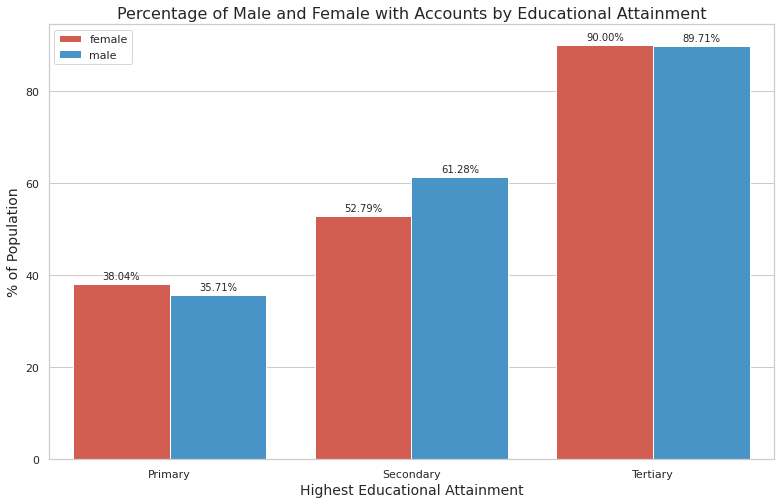

In [ ]:
# Define the data
data = {'educ': ['Primary', 'Secondary', 'Tertiary'],
        'female': [38.043478, 52.785924, 90.000000],
        'male': [35.714286, 61.276596, 89.705882]}
df = pd.DataFrame(data)

# Melt the dataframe to create a long format
df_melted = df.melt(id_vars=['educ'], var_name='Gender', value_name='Percent')

# Plot the data
sns.set(style="whitegrid")

plt.figure(figsize=(13, 8))
ax=sns.barplot(x='educ', y='Percent', hue='Gender', data=df_melted, palette=['#e74c3c', '#3498db'])
plt.title('Percentage of Male and Female with Accounts by Educational Attainment', fontsize=16)
plt.xlabel('Highest Educational Attainment', fontsize=14)
plt.ylabel('% of Population', fontsize=14)
plt.legend(title=None, loc='best')

# Add value labels to the bars
for container in ax.containers:
    for patch in container.patches:
        ax.annotate('{:.2f}%'.format(patch.get_height()), 
                    xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom', 
                    fontsize=10)

# Show plot
plt.show()

The plot shows the percentage of male and female with accounts by educational attainment. As educational attainment increases, the more financially included the individuals are.



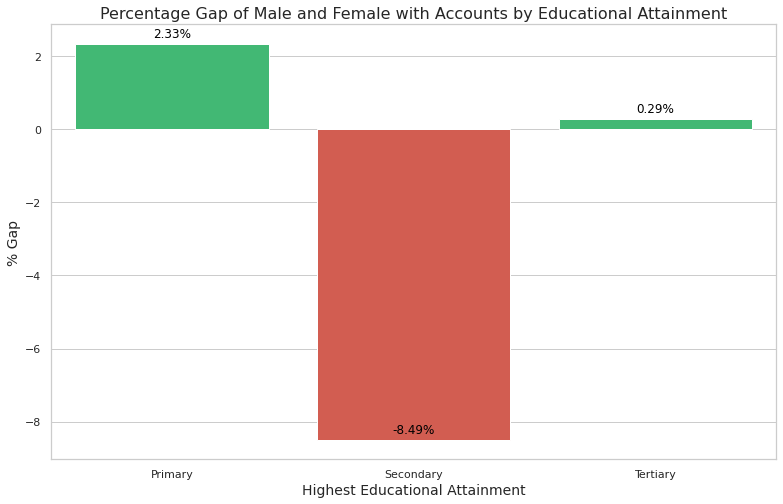

In [ ]:
# Plot the data
sns.set(style="whitegrid")
palette = sns.color_palette(["#2ecc71", "#e74c3c"])

plt.figure(figsize=(13, 8))
ax=sns.barplot(x='educ', y='percent_gender_gap', data=ph_data_pivot, palette=palette)
plt.title('Percentage Gap of Male and Female with Accounts by Educational Attainment', fontsize=16)
plt.xlabel('Highest Educational Attainment', fontsize=14)
plt.ylabel('% Gap', fontsize=14)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Show plot
plt.show()

The plot shows the percentage gap of male and female with accounts by educational attainment. The large gap is apparent to those who achieved secondary school.

Observations:
* Those who finished at most primary school has a gender gap of 2.33%.
* Those who finished secondary school has a gap of 8.49% in favor of the male.
* Those who finished at least tertiary education has a gap of less than 1%.

Based on the results, it is evident that the level of education significantly impacts financial inclusion. Individuals who have only completed elementary and high school are less likely to engage in transactions with formal financial institutions, possess a savings account, or utilize credit and insurance products compared to those who have completed vocational school, college, or higher education.

Education is frequently utilized as a proxy for financial literacy and the ability to participate in formal financial markets, as it is indicative of an individual's knowledge, skillset, and decision-making capacity. Having financial knowledge allows individuals to make informed decisions about saving, applying for loans, or obtaining insurance based on their specific needs and preferences ([Llanto and Rosellon, 2017](https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidsdps1738.pdf)).

## Reasons for Women Not Having a Bank Account

This section shows the reasons why female users do not have accounts in financial institution and mobile banking.

In [ ]:
# Check the count of women with and without account
women_data = ph_data[ph_data["female"]==1]
women_data_without_account = women_data[women_data["has_account"]==0]
women_data_with_account = women_data[women_data["has_account"]==1]


print(f"Women with account: {len(women_data_with_account)}")
print(f"Women without account: {len(women_data_without_account)}")

Women with account: 341
Women without account: 232


In [ ]:
# Filter to get only those without bank accounts
without_account_female = ph_data[(ph_data["has_account"] == 0) & (ph_data["female"]==1)].reset_index(drop=True)
# len(without_account_female)

In [ ]:
# Make a copy of the dataframe
without_account_reasons_women = without_account_female.copy()
# len(without_account_reasons_women)

In [ ]:
# Create a new column and set the value to 1.0 if it meets the condition
cols_to_check1 = ["fin11a", "fin11b",  "fin11c", "fin11f"]
cols_to_check2 = ["fin13_1a", "fin13_1b", "fin13_1c", "fin13_1d"]
new_cols_name = ["too_far", "too_expensive", "lack_documentation", "lack_money"]

for col1, col2, new_col in zip(cols_to_check1, cols_to_check2, new_cols_name):
    without_account_reasons_women[new_col] = 2.0
    without_account_reasons_women.loc[((without_account_reasons_women[col1] == 1) | (without_account_reasons_women[col2] == 1)), new_col] = 1.0
    print(col1, col2, new_col)

fin11a fin13_1a too_far
fin11b fin13_1b too_expensive
fin11c fin13_1c lack_documentation
fin11f fin13_1d lack_money


In [ ]:
# Rename the columns
without_account_reasons_women.rename(columns={
    'fin11d': 'lack_trust', 
    'fin11e': 'religious_reasons', 
    'fin11g': 'family_member_has_one', 
    'fin11h': 'no_need_for_fin_services',
    'fin13_1e':'prefers_agents_over_mobile', 
    'fin13_1f': 'no_mobile_phone'
}, inplace=True)

# View the dataframe 
# without_account_reasons_women.head()

In [ ]:
# Get only the relevant columns
without_account_reasons_women = without_account_reasons_women[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services", "prefers_agents_over_mobile", "no_mobile_phone"]].reset_index(drop=True)
# without_account_reasons_women.head()

In [ ]:
# Get the value counts for each column
reasons_count = without_account_reasons_women.apply(pd.Series.value_counts)

# Get the count of 1.0 for each reason
reasons_count_1 = reasons_count.loc[1].sort_values(ascending=True)
reasons_count_1

religious_reasons              26.0
lack_trust                     53.0
family_member_has_one          63.0
no_need_for_fin_services       75.0
too_far                       100.0
lack_documentation            100.0
too_expensive                 131.0
lack_money                    180.0
prefers_agents_over_mobile      NaN
no_mobile_phone                 NaN
Name: 1.0, dtype: float64

In [ ]:
# Filtered data without the NaN columns
without_account_reasons_women_cols = without_account_reasons_women[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services"]].reset_index(drop=True)
# len(without_account_reasons_women_cols)

In [ ]:
# Get value counts for each reason column
reason_counts = without_account_reasons_women_cols.apply(pd.Series.value_counts)

# Get count of "1" for each reason
reason_counts_1 = reason_counts.loc[1].sort_values(ascending=True)
reason_counts_1

religious_reasons            26.0
lack_trust                   53.0
family_member_has_one        63.0
no_need_for_fin_services     75.0
too_far                     100.0
lack_documentation          100.0
too_expensive               131.0
lack_money                  180.0
Name: 1.0, dtype: float64

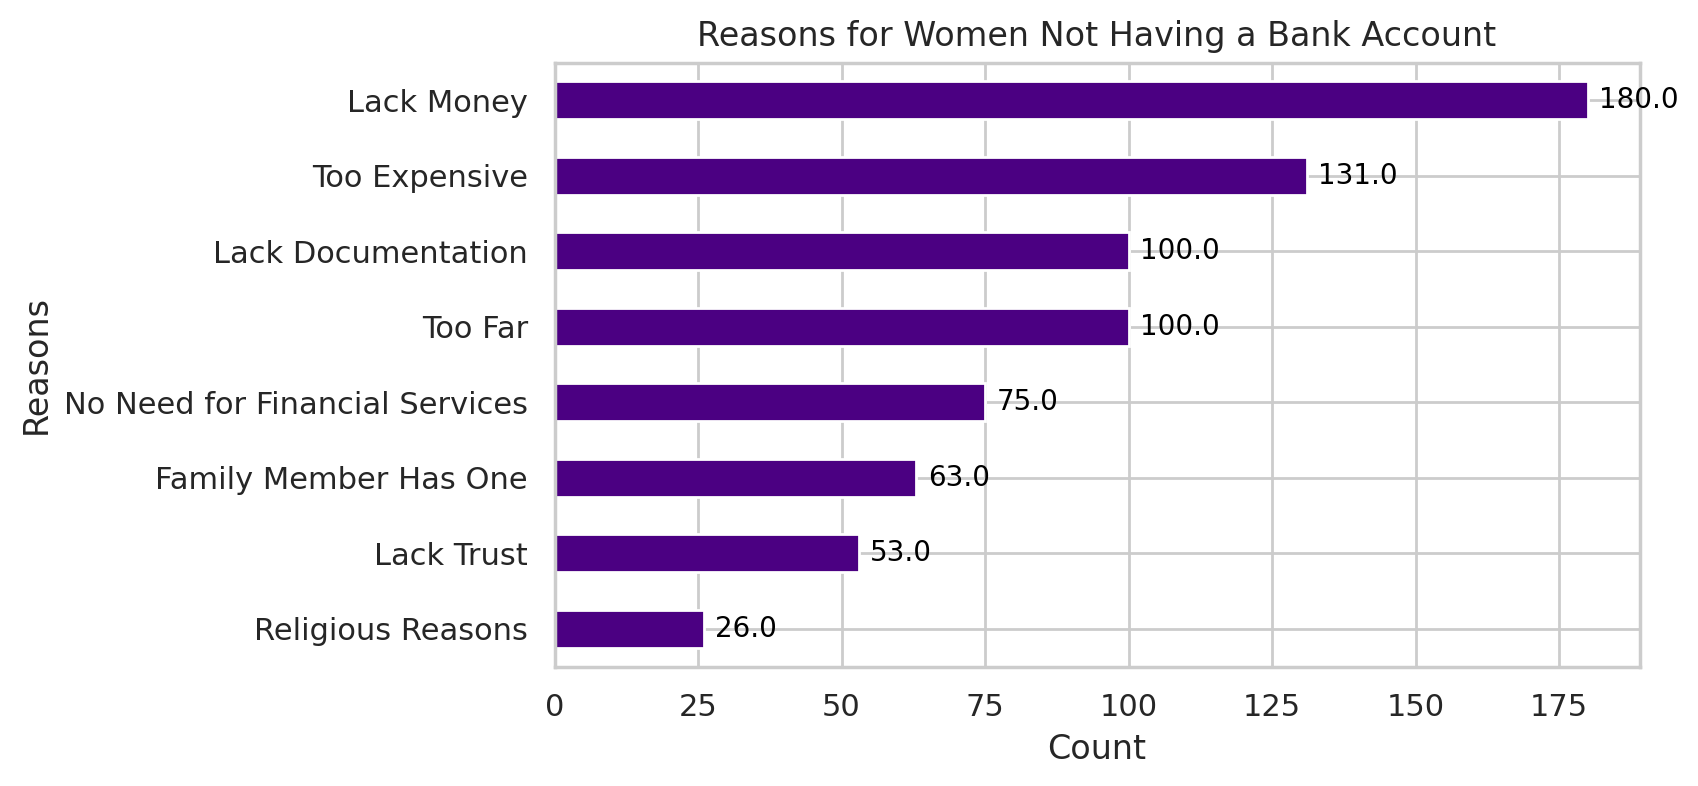

In [ ]:
# Define the labels
labels = ['Religious Reasons', 'Lack Trust', 'Family Member Has One', 'No Need for Financial Services', 'Too Far', 'Lack Documentation', 'Too Expensive', 'Lack Money']

# Set figure size
plt.figure(figsize=(7,4), dpi=200)

# Plot horizontal bar chart
ax = reason_counts_1.plot(kind='barh', color="indigo")
plt.title("Reasons for Women Not Having a Bank Account")
plt.xlabel("Count")
plt.ylabel("Reasons")

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Add value labels to bars
for reason, count in enumerate(reason_counts_1):
    ax.text(count + 2, reason, str(count), color='black', fontsize=10, va='center')

# Show plot
plt.show()

In [ ]:
# Get percentage of "1" for each reason
reason_percentages = reason_counts.loc[1] / len(women_data_without_account) * 100
reason_percentages=reason_percentages.sort_values(ascending=True)

In [ ]:
# Sanity check
reason_counts.loc[1] / len(women_data_without_account) * 100

too_far                     43.103448
too_expensive               56.465517
lack_documentation          43.103448
lack_money                  77.586207
lack_trust                  22.844828
religious_reasons           11.206897
family_member_has_one       27.155172
no_need_for_fin_services    32.327586
Name: 1.0, dtype: float64

In [ ]:
# Sanity check
(without_account_reasons_women["too_far"].value_counts().loc[1] / len(women_data_without_account)) * 100

43.103448275862064

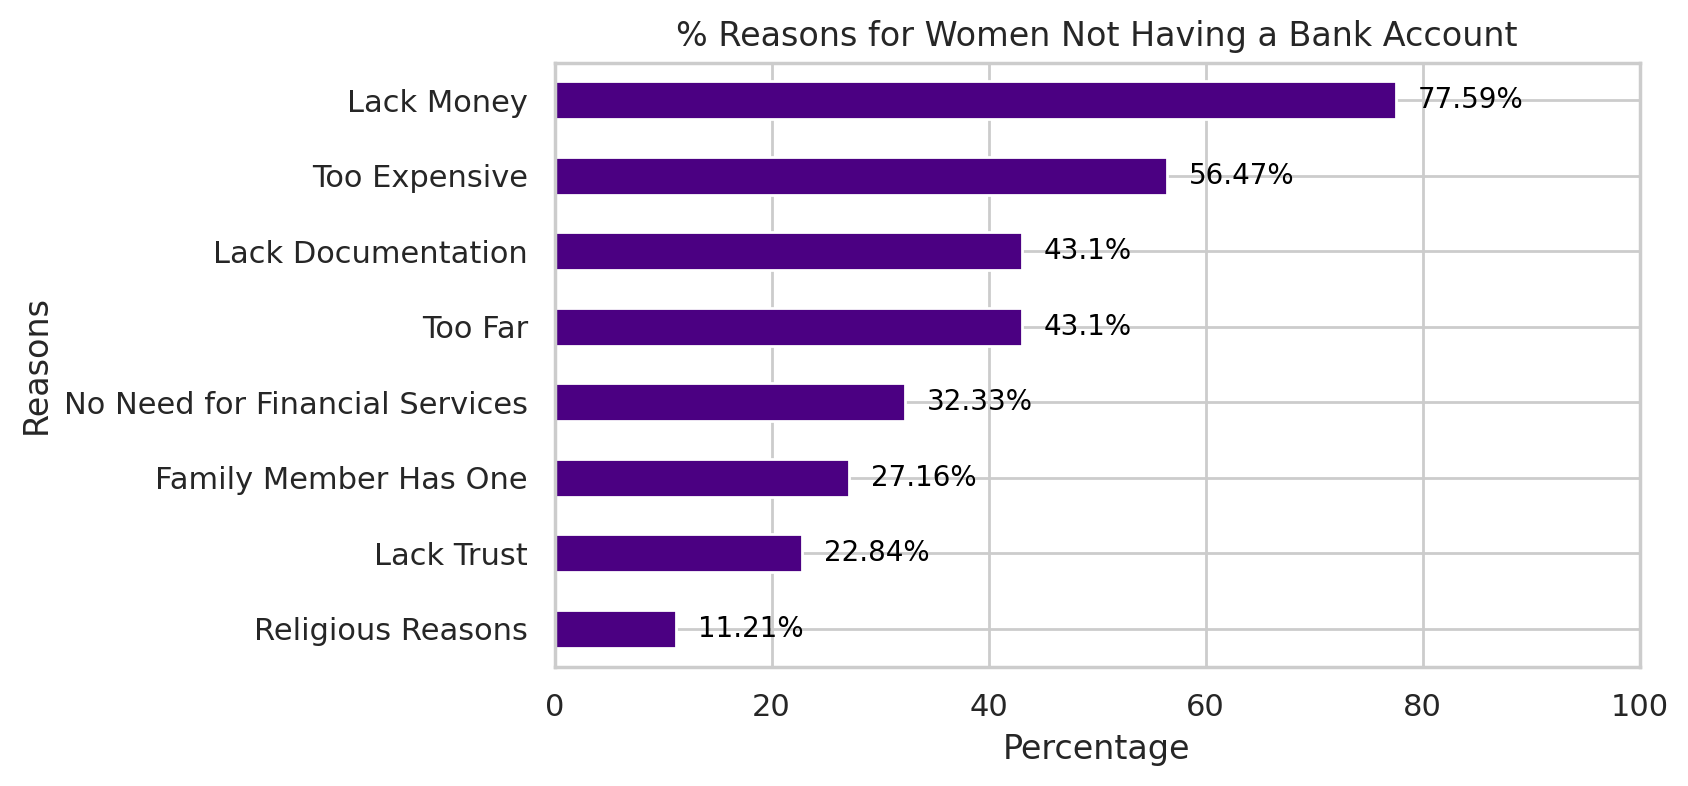

In [ ]:
# Define the labels
labels = ['Religious Reasons', 'Lack Trust', 'Family Member Has One', 'No Need for Financial Services', 'Too Far', 'Lack Documentation', 'Too Expensive', 'Lack Money']

# Set figure size
plt.figure(figsize=(7,4), dpi=200)

# Plot horizontal bar chart
ax = reason_percentages.plot(kind='barh', color="indigo")
plt.title("% Reasons for Women Not Having a Bank Account")
plt.xlabel("Percentage")
plt.ylabel("Reasons")
ax.set_xlim([0, 100])

# Add value labels to bars
for reason, percentage in enumerate(reason_percentages):
    ax.text(percentage + 2, reason, str(round(percentage, 2)) + '%', color='black', fontsize=10, va='center')

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Show plot
plt.show()

The plot shows that the top three reasons why women don't have a bank account are due to the following:
* 77.59% of them don't have enough money to use financial institutions or mobile money accounts.
* 56.47% of them said that financial services or mobile money products are too expensive.
* 43.1% of them said that they don't have the necessary documentation and that the financial institutions or mobile money agents are too far.


## Reasons for Women Having a Bank Account
This section shows the reasons why female users have accounts in financial institution and mobile banking.

In [ ]:
# Filter to get only those without bank accounts
with_account_female = ph_data[(ph_data["has_account"] == 1) & (ph_data["female"]==1)].reset_index(drop=True)
# len(with_account_female)

In [ ]:
# Make a copy of the dataframe
with_account_reasons_women = with_account_female.copy()
# with_account_reasons_women.head()

In [ ]:
# Create a new column and set the value to 1.0 if it meets the condition
cols_to_check1 = ["fin11a", "fin11b",  "fin11c", "fin11f"]
cols_to_check2 = ["fin13_1a", "fin13_1b", "fin13_1c", "fin13_1d"]
new_cols_name = ["too_far", "too_expensive", "lack_documentation", "lack_money"]

for col1, col2, new_col in zip(cols_to_check1, cols_to_check2, new_cols_name):
    with_account_reasons_women[new_col] = 2.0
    with_account_reasons_women.loc[((with_account_reasons_women[col1] == 1) | (with_account_reasons_women[col2] == 1)), new_col] = 1.0
    print(col1, col2, new_col)

fin11a fin13_1a too_far
fin11b fin13_1b too_expensive
fin11c fin13_1c lack_documentation
fin11f fin13_1d lack_money


In [ ]:
# Rename the columns
with_account_reasons_women.rename(columns={
    'fin11d': 'lack_trust', 
    'fin11e': 'religious_reasons', 
    'fin11g': 'family_member_has_one', 
    'fin11h': 'no_need_for_fin_services',
    'fin13_1e':'prefers_agents_over_mobile', 
    'fin13_1f': 'no_mobile_phone'
}, inplace=True)

In [ ]:
# Get only the relevant columns
with_account_reasons_women = with_account_reasons_women[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services", "prefers_agents_over_mobile", "no_mobile_phone"]].reset_index(drop=True)
# with_account_reasons_women.head()

In [ ]:
# Get the value counts for each column
reasons_count_wa = with_account_reasons_women.apply(pd.Series.value_counts)

# Get the count of 1.0 for each reason
reasons_count_1_wa = reasons_count_wa.loc[1].sort_values(ascending=True)
reasons_count_1_wa

lack_trust                    15.0
religious_reasons             15.0
lack_documentation            27.0
too_far                       33.0
no_need_for_fin_services      34.0
family_member_has_one         36.0
too_expensive                 47.0
lack_money                    66.0
prefers_agents_over_mobile     NaN
no_mobile_phone                NaN
Name: 1.0, dtype: float64

In [ ]:
# Filtered data without the NaN columns
with_account_reasons_women_cols = with_account_reasons_women[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services"]].reset_index(drop=True)

In [ ]:
# Get value counts for each reason column
reasons_count_wa = with_account_reasons_women_cols.apply(pd.Series.value_counts)

# Get count of "1" for each reason
reasons_count_1_wa = reasons_count_wa.loc[1].sort_values(ascending=True)
reasons_count_1_wa

lack_trust                  15
religious_reasons           15
lack_documentation          27
too_far                     33
no_need_for_fin_services    34
family_member_has_one       36
too_expensive               47
lack_money                  66
Name: 1.0, dtype: int64

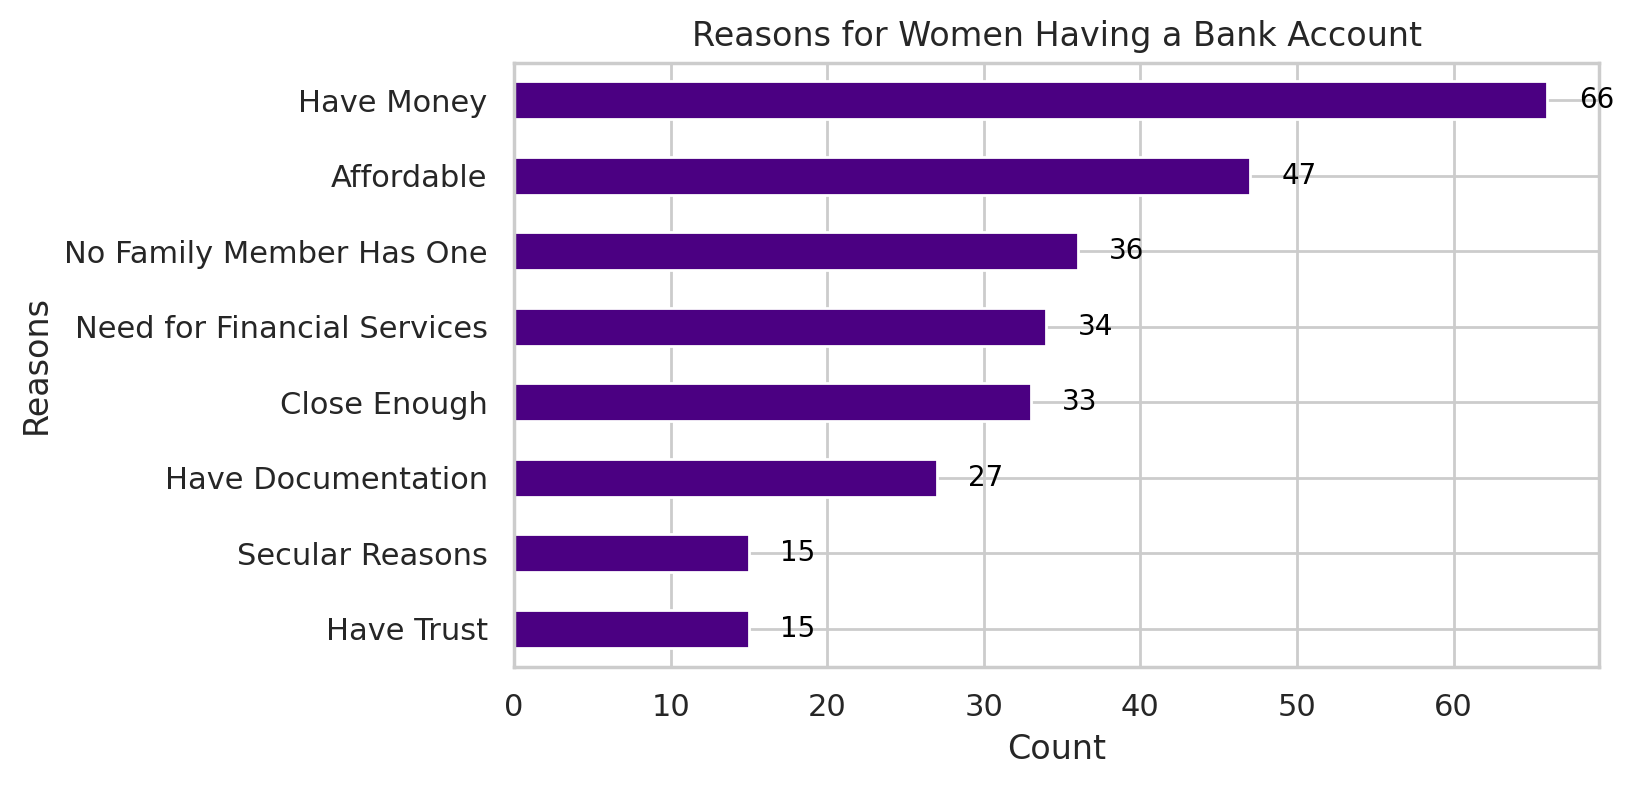

In [ ]:
# Define the labels
labels = ['Have Trust', 'Secular Reasons',  'Have Documentation', 'Close Enough', 'Need for Financial Services', 'No Family Member Has One', 'Affordable', 'Have Money']

# Set figure size
plt.figure(figsize=(7,4), dpi=200)

# Plot horizontal bar chart
ax = reasons_count_1_wa.plot(kind='barh', color="indigo")
plt.title("Reasons for Women Having a Bank Account")
plt.xlabel("Count")
plt.ylabel("Reasons")

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Add value labels to bars
for reason, count in enumerate(reasons_count_1_wa):
    ax.text(count + 2, reason, str(count), color='black', fontsize=10, va='center')

# Show plot
plt.show()

In [ ]:
# Get percentage of "1" for each reason
reason_percentages = reasons_count_wa.loc[1] / len(women_data_with_account) * 100
reason_percentages = reason_percentages.sort_values(ascending=True)
reason_percentages

lack_trust                   4.398827
religious_reasons            4.398827
lack_documentation           7.917889
too_far                      9.677419
no_need_for_fin_services     9.970674
family_member_has_one       10.557185
too_expensive               13.782991
lack_money                  19.354839
Name: 1.0, dtype: float64

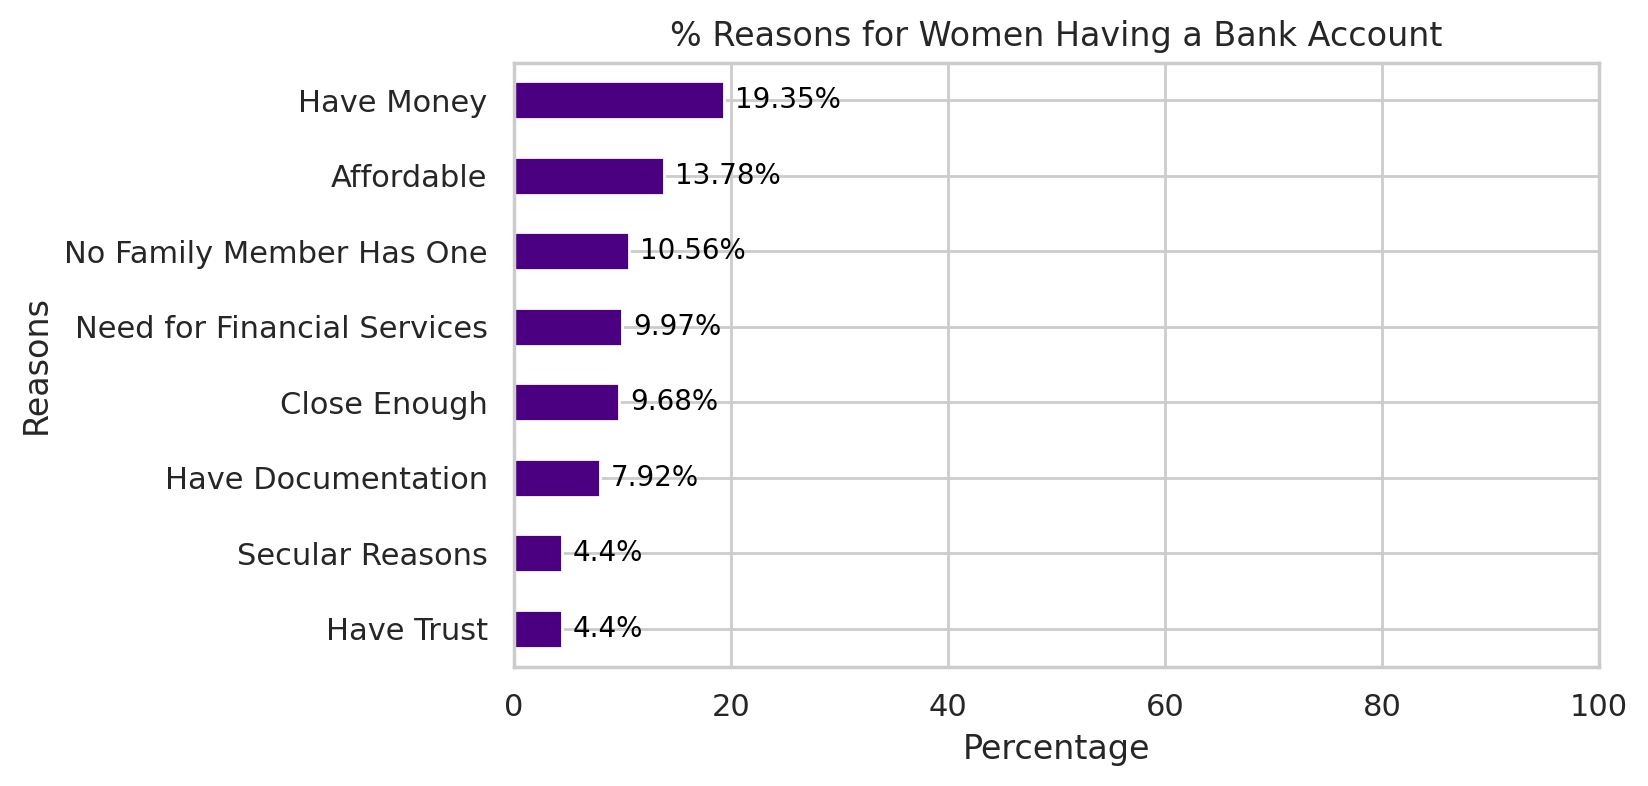

In [ ]:
# Define the labels
labels = ['Have Trust', 'Secular Reasons',  'Have Documentation', 'Close Enough', 'Need for Financial Services', 'No Family Member Has One', 'Affordable', 'Have Money']

# Set figure size
plt.figure(figsize=(7,4), dpi=200)

# Plot horizontal bar chart
ax = reason_percentages.plot(kind='barh', color="indigo")
plt.title("% Reasons for Women Having a Bank Account")
plt.xlabel("Percentage")
plt.ylabel("Reasons")
ax.set_xlim([0, 100])

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Add value labels to bars
for reason, percentage in enumerate(reason_percentages):
    ax.text(percentage + 1, reason, str(round(percentage, 2)) + '%', color='black', fontsize=10, va='center')

# Show plot
plt.show()

The plot shows that the top three reasons why women have a bank account are due to the following:
* 19.35% of them enough money to use financial institutions or mobile money accounts.
* 13.47% of them said that financial services or mobile money products are not too expensive.
* 10.56% of them said that someone else in the
family does not have an account.

## Reasons for Men Not Having a Bank Account

This section shows the reasons why male users do not have accounts in financial institution and mobile banking.

In [ ]:
# Check the count of women with and without account
men_data = ph_data[ph_data["female"]==2]
men_data_without_account = men_data[men_data["has_account"]==0]
men_data_with_account = men_data[men_data["has_account"]==1]


print(f"Men with account: {len(men_data_with_account)}")
print(f"Men without account: {len(men_data_without_account)}")

Men with account: 286
Men without account: 141


In [ ]:
# Filter to get only those without bank accounts
without_account_male = ph_data[(ph_data["has_account"] == 0) & (ph_data["female"]==2)].reset_index(drop=True)
# len(without_account_male)

In [ ]:
# Make a copy of the dataframe
without_account_reasons_men = without_account_male.copy()
len(without_account_reasons_men)

141

In [ ]:
# Create a new column and set the value to 1.0 if it meets the condition
cols_to_check1 = ["fin11a", "fin11b",  "fin11c", "fin11f"]
cols_to_check2 = ["fin13_1a", "fin13_1b", "fin13_1c", "fin13_1d"]
new_cols_name = ["too_far", "too_expensive", "lack_documentation", "lack_money"]

for col1, col2, new_col in zip(cols_to_check1, cols_to_check2, new_cols_name):
    without_account_reasons_men[new_col] = 2.0
    without_account_reasons_men.loc[((without_account_reasons_men[col1] == 1) | (without_account_reasons_men[col2] == 1)), new_col] = 1.0
    print(col1, col2, new_col)

fin11a fin13_1a too_far
fin11b fin13_1b too_expensive
fin11c fin13_1c lack_documentation
fin11f fin13_1d lack_money


In [ ]:
# Rename the columns
without_account_reasons_men.rename(columns={
    'fin11d': 'lack_trust', 
    'fin11e': 'religious_reasons', 
    'fin11g': 'family_member_has_one', 
    'fin11h': 'no_need_for_fin_services',
    'fin13_1e':'prefers_agents_over_mobile', 
    'fin13_1f': 'no_mobile_phone'
}, inplace=True)

# View the dataframe 
# without_account_reasons_men.head()

In [ ]:
# Get only the relevant columns
without_account_reasons_men = without_account_reasons_men[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services", "prefers_agents_over_mobile", "no_mobile_phone"]].reset_index(drop=True)
# without_account_reasons_men.head()

In [ ]:
# Get the value counts for each column
reasons_count_men = without_account_reasons_men.apply(pd.Series.value_counts)

# Get the count of 1.0 for each reason
reasons_count_1_men = reasons_count_men.loc[1].sort_values(ascending=True)
reasons_count_1_men

religious_reasons              20.0
lack_trust                     25.0
lack_documentation             48.0
family_member_has_one          48.0
too_far                        53.0
no_need_for_fin_services       56.0
too_expensive                  74.0
lack_money                    105.0
prefers_agents_over_mobile      NaN
no_mobile_phone                 NaN
Name: 1.0, dtype: float64

In [ ]:
# Filtered data without the NaN columns
without_account_reasons_men_cols = without_account_reasons_men[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services"]].reset_index(drop=True)
# len(without_account_reasons_men_cols)

In [ ]:
# Get value counts for each reason column
reasons_count_men = without_account_reasons_men_cols.apply(pd.Series.value_counts)

# Get count of "1" for each reason
reasons_count_1_men = reasons_count_men.loc[1].sort_values(ascending=True)
reasons_count_1_men

religious_reasons            20.0
lack_trust                   25.0
lack_documentation           48.0
family_member_has_one        48.0
too_far                      53.0
no_need_for_fin_services     56.0
too_expensive                74.0
lack_money                  105.0
Name: 1.0, dtype: float64

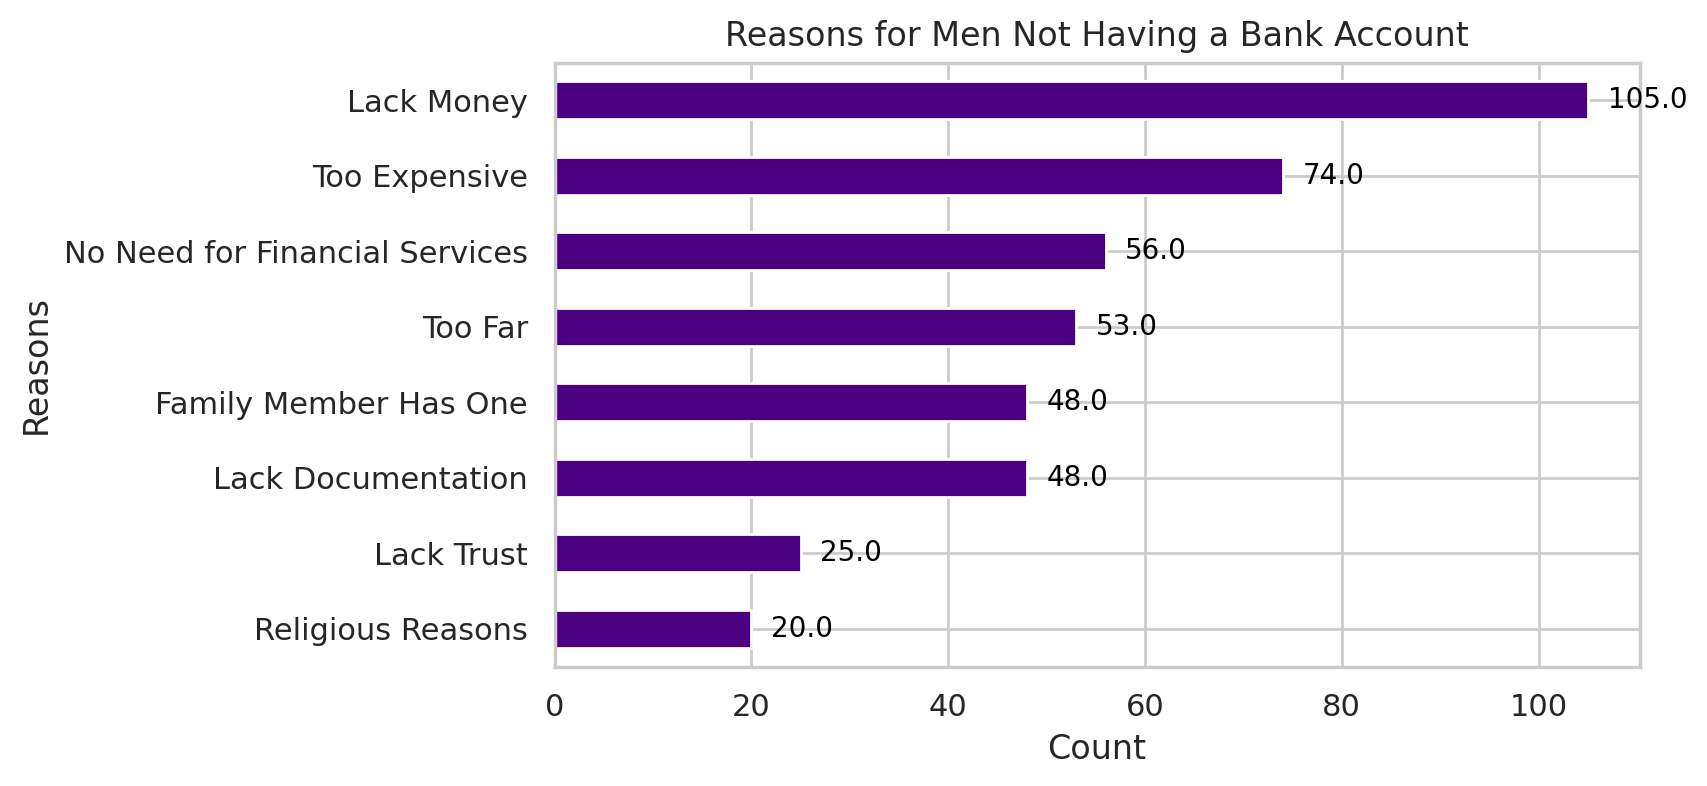

In [ ]:
# Define the labels
labels = ['Religious Reasons', 'Lack Trust', 'Lack Documentation', 'Family Member Has One', 'Too Far', 'No Need for Financial Services', 'Too Expensive', 'Lack Money']

# Set figure size
plt.figure(figsize=(7,4), dpi=200)

# Plot horizontal bar chart
ax = reasons_count_1_men.plot(kind='barh', color="indigo")
plt.title("Reasons for Men Not Having a Bank Account")
plt.xlabel("Count")
plt.ylabel("Reasons")

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Add value labels to bars
for reason, count in enumerate(reasons_count_1_men):
    ax.text(count + 2, reason, str(count), color='black', fontsize=10, va='center')

# Show plot
plt.show()

In [ ]:
# Get percentage of "1" for each reason
reason_percentages_men = reasons_count_men.loc[1] / len(men_data_without_account) * 100
reason_percentages_men = reason_percentages_men.sort_values(ascending=True)
reason_percentages_men

religious_reasons           14.184397
lack_trust                  17.730496
lack_documentation          34.042553
family_member_has_one       34.042553
too_far                     37.588652
no_need_for_fin_services    39.716312
too_expensive               52.482270
lack_money                  74.468085
Name: 1.0, dtype: float64

In [ ]:
# Sanity check
reasons_count_men.loc[1] / len(men_data_without_account) * 100

too_far                     37.588652
too_expensive               52.482270
lack_documentation          34.042553
lack_money                  74.468085
lack_trust                  17.730496
religious_reasons           14.184397
family_member_has_one       34.042553
no_need_for_fin_services    39.716312
Name: 1.0, dtype: float64

In [ ]:
# Sanity check
(without_account_reasons_men["too_far"].value_counts().loc[1] / len(men_data_without_account)) * 100

37.5886524822695

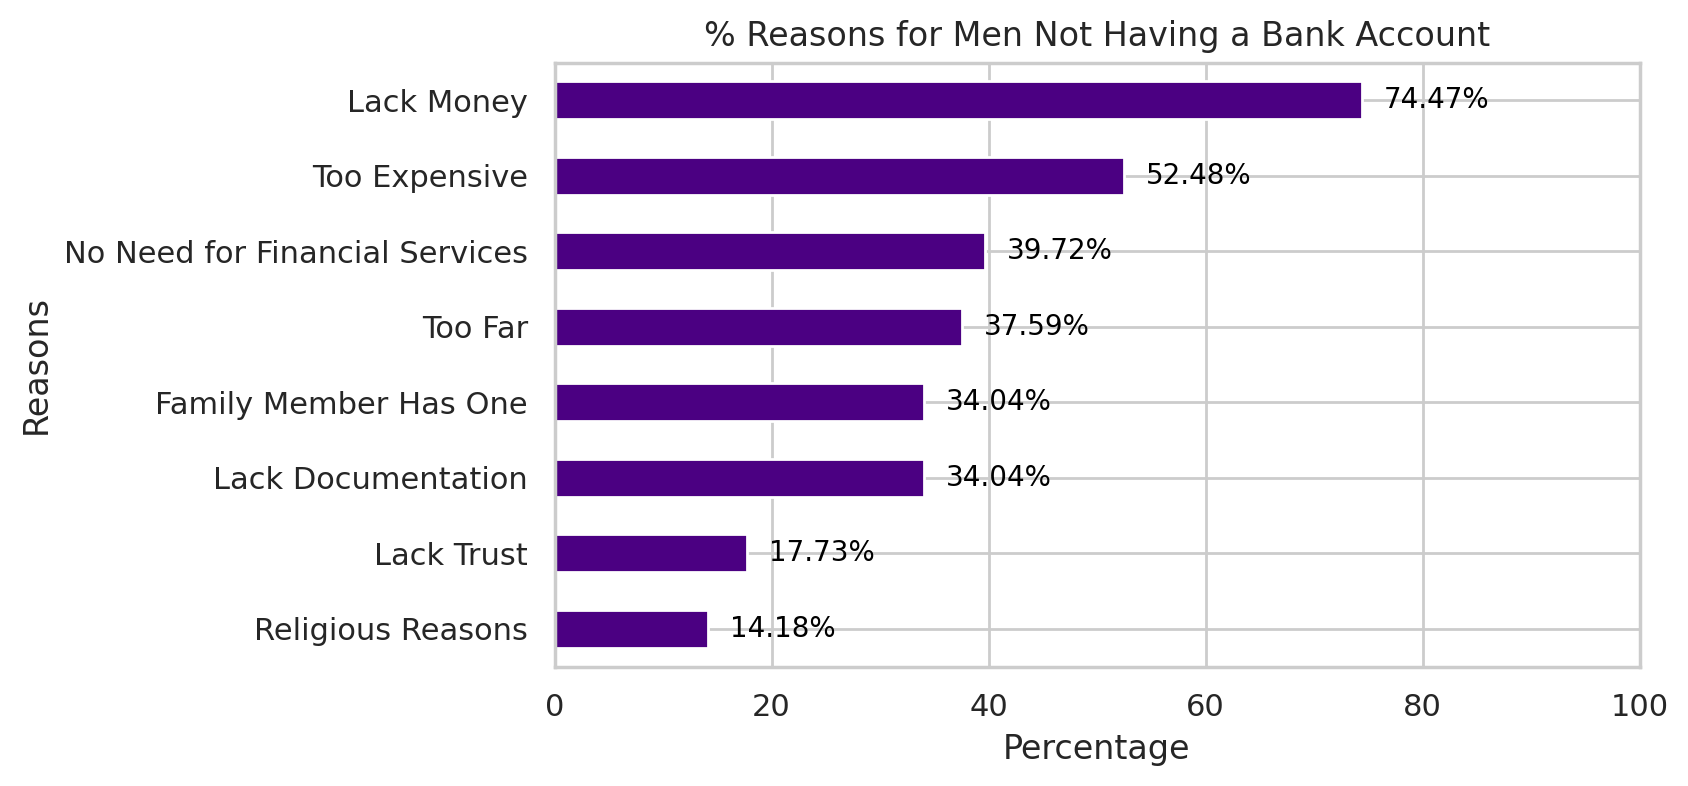

In [ ]:
# Define the labels
labels = ['Religious Reasons', 'Lack Trust', 'Lack Documentation', 'Family Member Has One', 'Too Far', 'No Need for Financial Services', 'Too Expensive', 'Lack Money']

# Set figure size
plt.figure(figsize=(7, 4), dpi=200)

# Plot horizontal bar chart
ax = reason_percentages_men.plot(kind='barh', color="indigo")
plt.title("% Reasons for Men Not Having a Bank Account")
plt.xlabel("Percentage")
plt.ylabel("Reasons")
ax.set_xlim([0, 100])

# Add value labels to bars
for reason, percentage in enumerate(reason_percentages_men):
    ax.text(percentage + 2, reason, str(round(percentage, 2)) + '%', color='black', fontsize=10, va='center')

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Show plot
plt.show()

The plot shows that the top three reasons why women don't have a bank account are due to the following:
* 74.47% of them don't have enough money to use financial institutions or mobile money accounts.
* 52.48% of them said that financial services or mobile money products are too expensive.
* 39.72% of them said that they have no need for financial services at a formal institution.

## Reasons for Men Having a Bank Account
This section shows the reasons why male users have accounts in financial institution and mobile banking.

In [ ]:
# Filter to get only those without bank accounts
with_account_male = ph_data[(ph_data["has_account"] == 1) & (ph_data["female"]==2)].reset_index(drop=True)
# len(with_account_male)

In [ ]:
# Make a copy of the dataframe
with_account_reasons_men = with_account_male.copy()
# with_account_male.head()

In [ ]:
# Create a new column and set the value to 1.0 if it meets the condition
cols_to_check1 = ["fin11a", "fin11b",  "fin11c", "fin11f"]
cols_to_check2 = ["fin13_1a", "fin13_1b", "fin13_1c", "fin13_1d"]
new_cols_name = ["too_far", "too_expensive", "lack_documentation", "lack_money"]

for col1, col2, new_col in zip(cols_to_check1, cols_to_check2, new_cols_name):
    with_account_reasons_men[new_col] = 2.0
    with_account_reasons_men.loc[((with_account_reasons_men[col1] == 1) | (with_account_reasons_men[col2] == 1)), new_col] = 1.0
    print(col1, col2, new_col)

fin11a fin13_1a too_far
fin11b fin13_1b too_expensive
fin11c fin13_1c lack_documentation
fin11f fin13_1d lack_money


In [ ]:
# Rename the columns
with_account_reasons_men.rename(columns={
    'fin11d': 'lack_trust', 
    'fin11e': 'religious_reasons', 
    'fin11g': 'family_member_has_one', 
    'fin11h': 'no_need_for_fin_services',
    'fin13_1e':'prefers_agents_over_mobile', 
    'fin13_1f': 'no_mobile_phone'
}, inplace=True)

In [ ]:
# Get only the relevant columns
with_account_reasons_men = with_account_reasons_men[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services", "prefers_agents_over_mobile", "no_mobile_phone"]].reset_index(drop=True)
# with_account_reasons_men.head()

In [ ]:
# Get the value counts for each column
reasons_count_wa_men = with_account_reasons_men.apply(pd.Series.value_counts)

# Get the count of 1.0 for each reason
reasons_count_1_wa_men = reasons_count_wa_men.loc[1].sort_values(ascending=True)
reasons_count_1_wa_men

religious_reasons              4.0
lack_trust                     6.0
too_far                       17.0
too_expensive                 17.0
family_member_has_one         20.0
no_need_for_fin_services      20.0
lack_documentation            22.0
lack_money                    31.0
prefers_agents_over_mobile     NaN
no_mobile_phone                NaN
Name: 1.0, dtype: float64

In [ ]:
# Filtered data without the NaN columns
with_account_reasons_men_cols = with_account_reasons_men[["too_far", "too_expensive", "lack_documentation", "lack_money", "lack_trust", "religious_reasons", "family_member_has_one", "no_need_for_fin_services"]].reset_index(drop=True)

In [ ]:
# Get value counts for each reason column
reasons_count_wa_men = with_account_reasons_men_cols.apply(pd.Series.value_counts)

# Get count of "1" for each reason
reasons_count_1_wa_men = reasons_count_wa_men.loc[1].sort_values(ascending=True)
reasons_count_1_wa_men

religious_reasons            4
lack_trust                   6
too_far                     17
too_expensive               17
family_member_has_one       20
no_need_for_fin_services    20
lack_documentation          22
lack_money                  31
Name: 1.0, dtype: int64

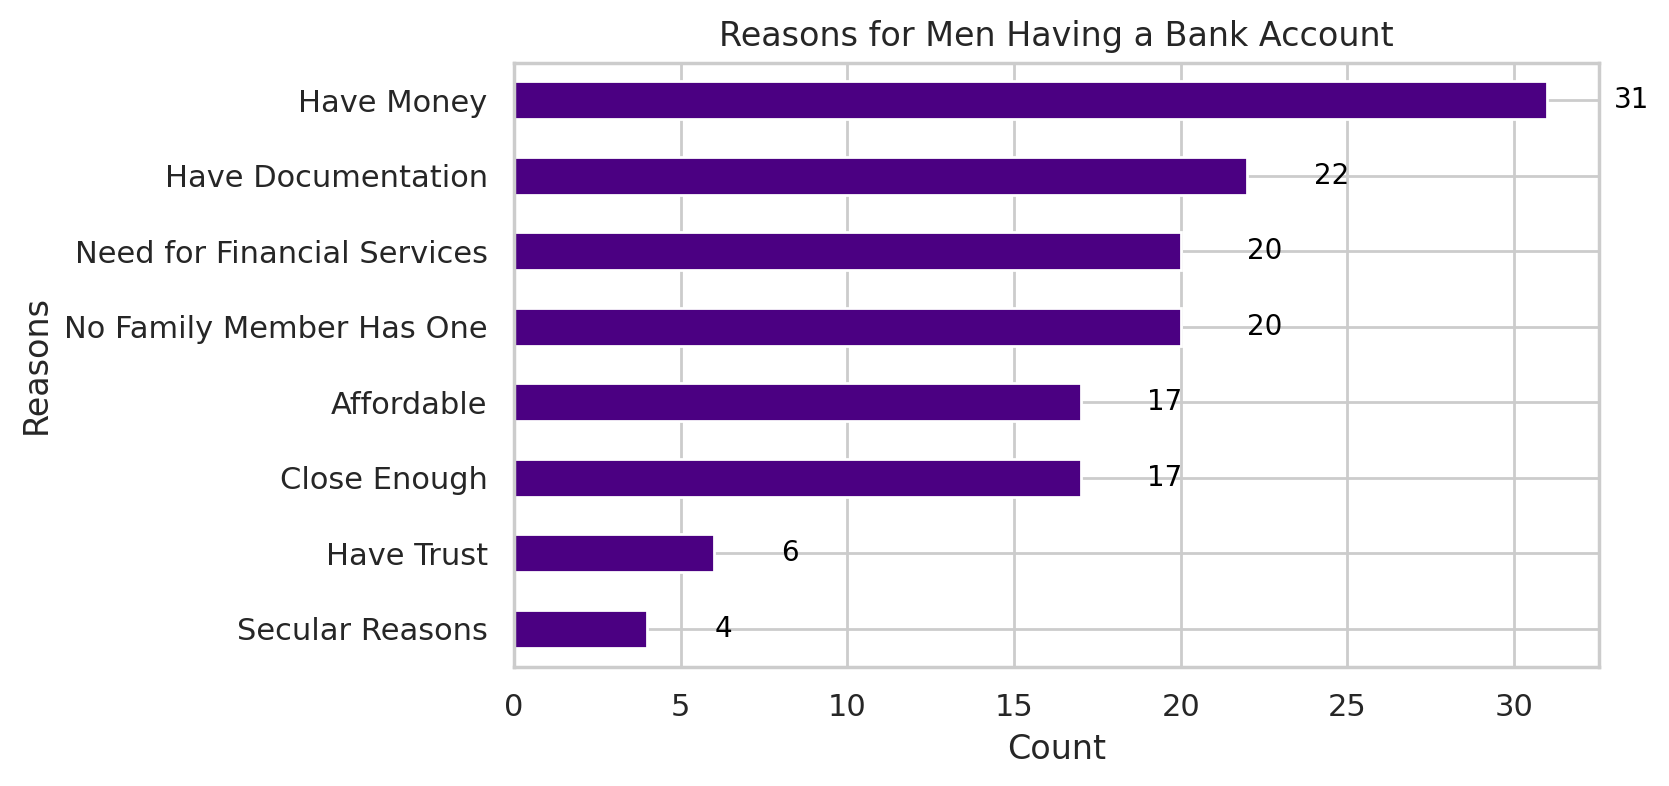

In [ ]:
# Define the labels
labels = ['Secular Reasons', 'Have Trust',  'Close Enough', 'Affordable', 'No Family Member Has One', 'Need for Financial Services', 'Have Documentation', 'Have Money']

# Set figure size
plt.figure(figsize=(7,4), dpi=200)

# Plot horizontal bar chart
ax = reasons_count_1_wa_men.plot(kind='barh', color="indigo")
plt.title("Reasons for Men Having a Bank Account")
plt.xlabel("Count")
plt.ylabel("Reasons")

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Add value labels to bars
for reason, count in enumerate(reasons_count_1_wa_men):
    ax.text(count + 2, reason, str(count), color='black', fontsize=10, va='center')

# Show plot
plt.show()

In [ ]:
# Get percentage of "1" for each reason
reason_percentages_men = reasons_count_wa_men.loc[1] / len(men_data_with_account) * 100
reason_percentages_men = reason_percentages_men.sort_values(ascending=True)
reason_percentages_men

religious_reasons            1.398601
lack_trust                   2.097902
too_far                      5.944056
too_expensive                5.944056
family_member_has_one        6.993007
no_need_for_fin_services     6.993007
lack_documentation           7.692308
lack_money                  10.839161
Name: 1.0, dtype: float64

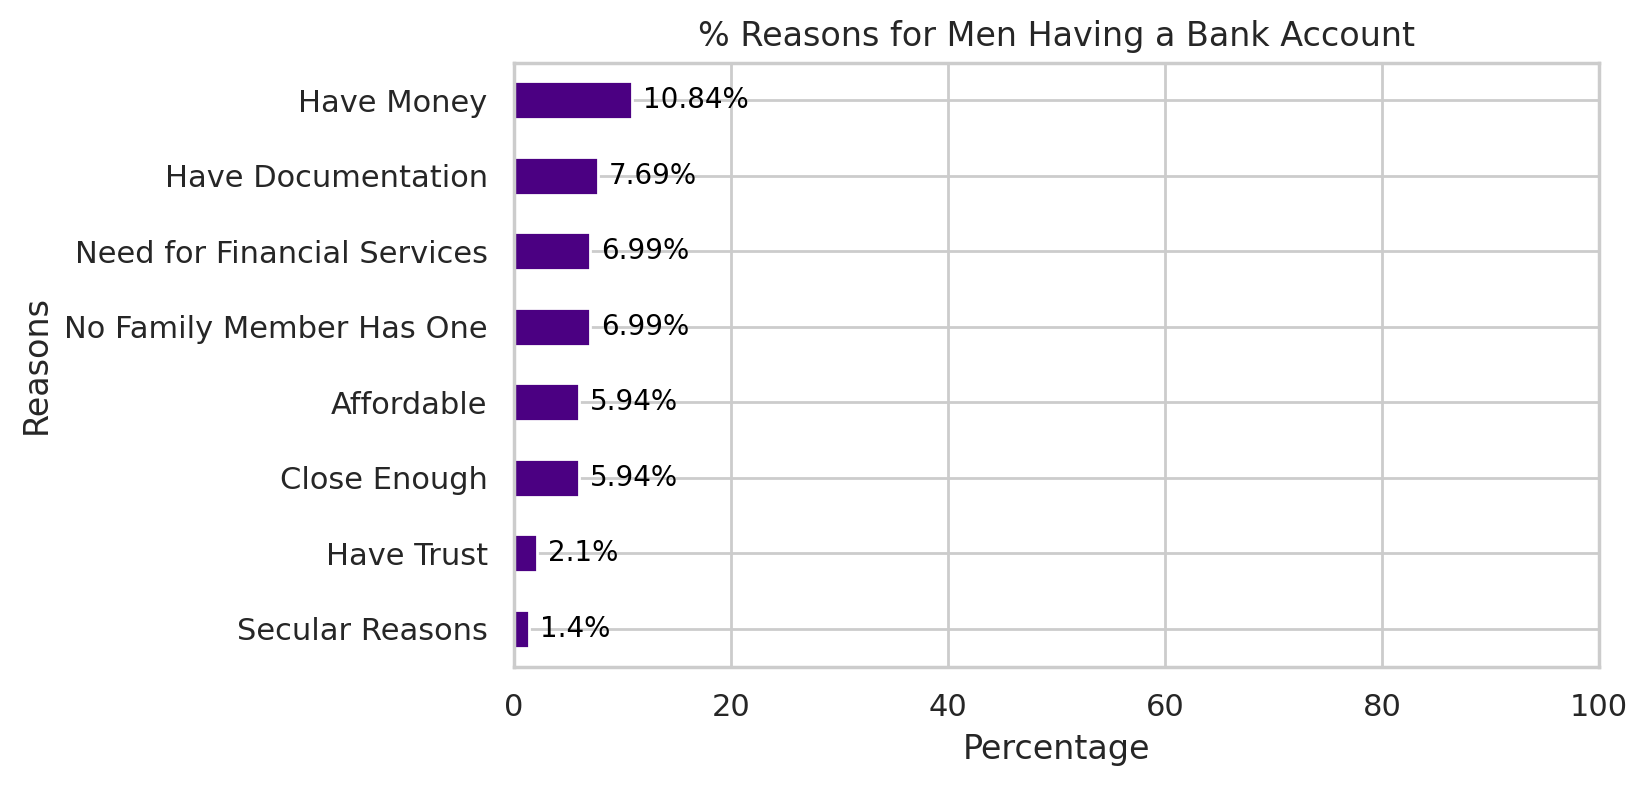

In [ ]:
# Define the labels
labels = ['Secular Reasons', 'Have Trust',  'Close Enough', 'Affordable', 'No Family Member Has One', 'Need for Financial Services', 'Have Documentation', 'Have Money']

# Set figure size
plt.figure(figsize=(7,4), dpi=200)

# Plot horizontal bar chart
ax = reason_percentages_men.plot(kind='barh', color="indigo")
plt.title("% Reasons for Men Having a Bank Account")
plt.xlabel("Percentage")
plt.ylabel("Reasons")
ax.set_xlim([0, 100])

# Change the labels of y ticks
ax.set_yticklabels(labels)

# Add value labels to bars
for reason, percentage in enumerate(reason_percentages_men):
    ax.text(percentage + 1, reason, str(round(percentage, 2)) + '%', color='black', fontsize=10, va='center')

# Show plot
plt.show()

The plot shows that the top three reasons why men have a bank account are due to the following:
* 10.84% of them enough money to use financial institutions or mobile money accounts.
* 7.69% of them said that they have the necessary documentation to have an account.
* 6.99% of them said that they have a need for financial services or that someone else in the family does not have an account.

# Reference:
* [2021 Financial Inclusion Report of BSP](https://www.bsp.gov.ph/Inclusive%20Finance/Financial%20Inclusion%20Reports%20and%20Publications/2021/2021FISToplineReport.pdf)

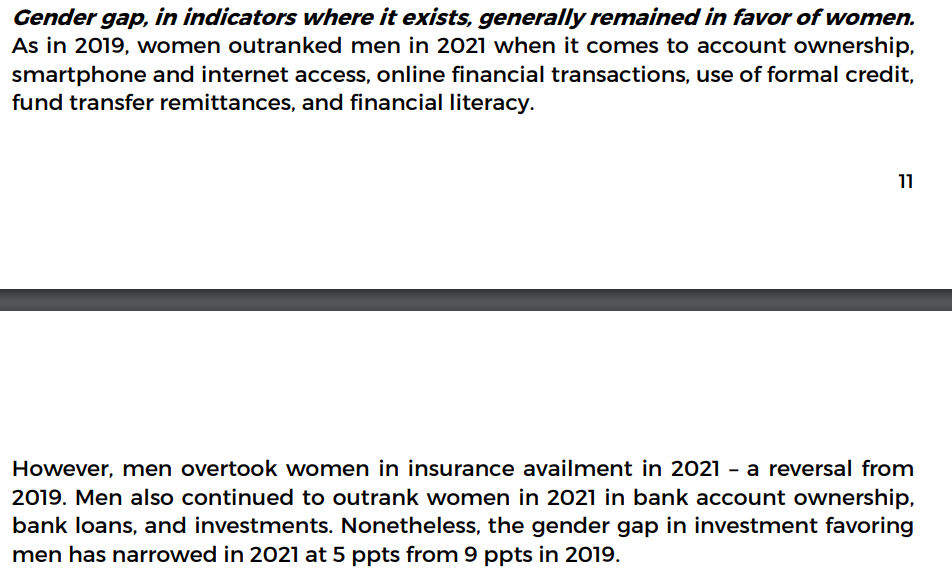

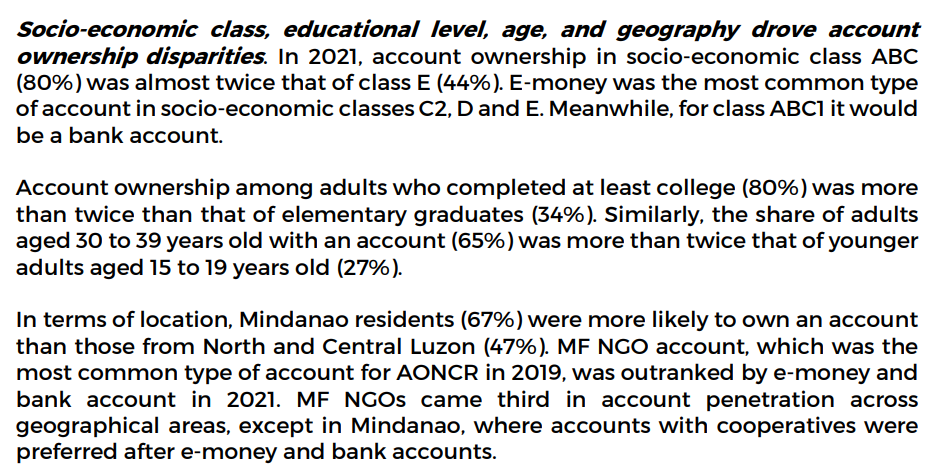

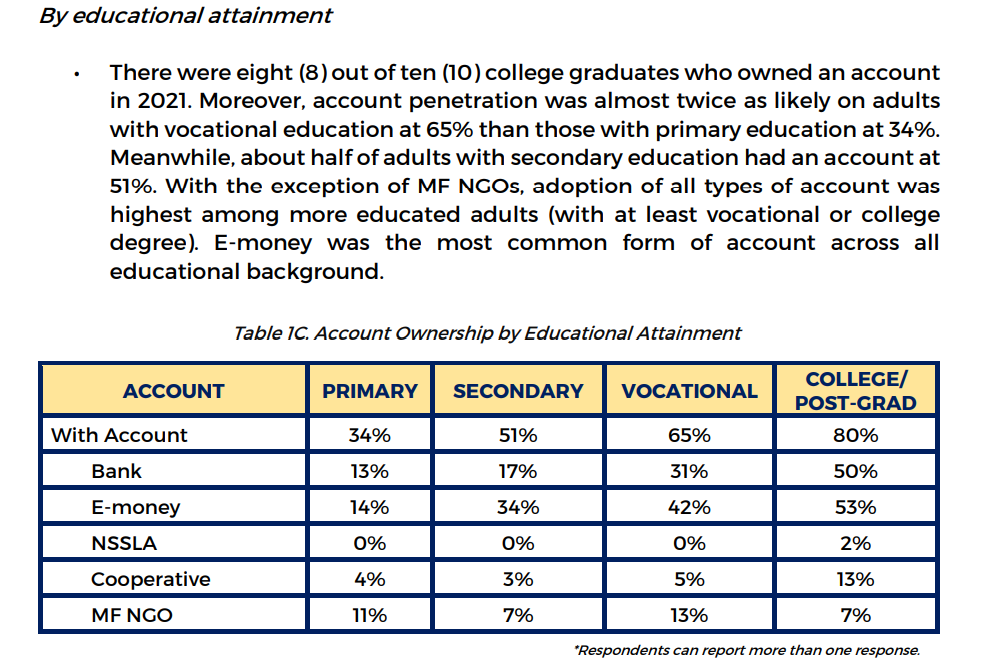

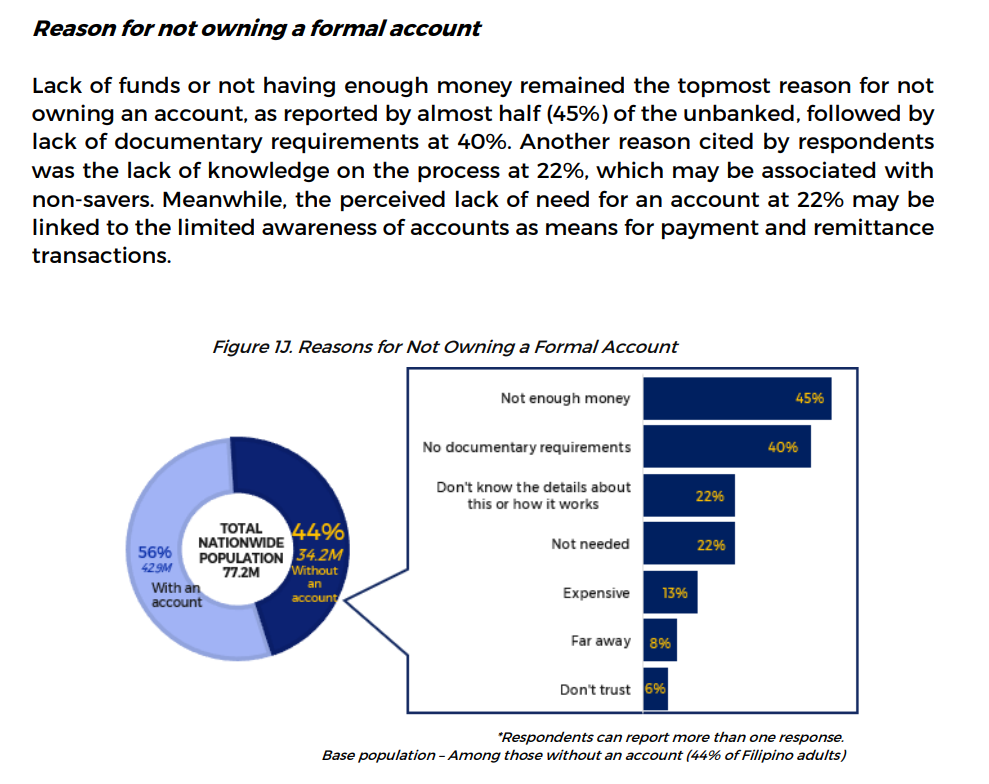